# TASK-2 Optical Character Recognition-Shreemirrah
## Using  Google's 'pytessaract' OCR Engine and OpenCV Library

### Problem Statement:
to find:
1. Invoice Date
2. Invoice Number
3. Billing Information
4. Shipping Information
5. Email
6. Total Invoice Amount
7. Number of Items in the Invoice.

# Approach
##### 1. Convert the pdf file to an image format to work easily. Stored as 'sample_invoice.jpg' in the project directory. Achieved using pdf2image and poppler libraries
2. Use pytessaract OCR engine to perform Optical Character Recognition(achieved using pre-built LSTM architecture) in the image and store it in a variable
3. Preprocessing steps: convert the image to other types: canny, gray_scale, erosion, dilation, skew_correction and check the better recogition. Here, it is found that the original image has the best results. Moving on to the steps.

#### Step 1
##### 1. First, one-line information such as 'Invoice date', 'Invoice number', 'Email' are focused.
2. Bounding boxes are drawn over the all the detected words in the text
3. Using regex module, valid date, E-Mail and Invoice Number are detected using patterns in regular expressions.
4. They are stored in the respective variables, and the image is again displayed, with the bounding boxes over the area of only the required information.


#### Step 2
##### 1. Tabluar data
2. From the recognized data, it is observed that the text starting from Description' forms the tabular data.
3. Entire text is converted to a data frame and a sub-data_frame is generated for the tabular data.
4. The sub-data_frame is then modified using functions
5. The data frame is extensively processed and cleaned mannually
##### 6. operations are performed on the data frame to find the 'total invoice amount' and 'number of items in invoice'

#### Step 3
1. For informtaion under a particular heading, such as 'Billing Information' and 'Shipping Information'
2. from the orignial variable that stores the text, find the index where the text starts
3. similarly find the index where it ends
4. perform slicing operation and store substring in a variable.
5. Here, both Billing and Shipping information are stored in the same variable.


# Import necessary libraries

In [1]:
import json
import cv2 
from pdf2image import convert_from_path
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

# Convert PDF File to image file(jpg) and store in the project directory

In [2]:
pdf_file = 'sample_invoice.pdf'
pages = convert_from_path(pdf_file, 500,poppler_path=r'C:\Program Files\poppler-23.11.0\Library\bin')

for page in range(len(pages)):
    pages[page].save('sample_invoice.jpg', 'JPEG')

# Peroform OCR on the original image

In [3]:
img = cv2.imread('sample_invoice.jpg')
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(img, config=custom_config))
data_original=pytesseract.image_to_string(img, config=custom_config)

06/10/2021
re \Company apes) em | em . | INVO-005
Sie Sample Invoice

Billing Information Shipping Information

Company Name Name

ABC Company John Smith Sam K. Smith

Address Address

111 Pine Street, Suite 1815 111 Pine Street, Suite 1815

San Francisco, CA, 94111 san Francisco, CA, 94111

Phone Number

(123) 123-1232

Email

John@example.com

Description Quantity Unit Price Total
Product/Service 1 Sink 2 100 $200
Product/Service 2 Nest Smart Filter 1 150 $150
Product/Service 3 Labor Fee 1 50 $50
Product/Service 4 Service Fee 1 25 $25
Total: $425
1



81


# Preprocessing - Convert image to various forms to comapare and test performance

In [4]:
img = cv2.imread('sample_invoice.jpg')


def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def remove_noise(image):
    return cv2.medianBlur(image,5)
 

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    

def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)


def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)


def canny(image):
    return cv2.Canny(image, 100, 200)


def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [5]:
image = cv2.imread('sample_invoice.jpg')

gray = get_grayscale(image)
data_gray=pytesseract.image_to_string(gray, config=custom_config)


thresh = thresholding(gray)
data_thresh=pytesseract.image_to_string(thresh, config=custom_config)

opening = opening(gray)
data_opening=pytesseract.image_to_string(opening, config=custom_config)


canny = canny(gray)
data_canny=pytesseract.image_to_string(canny, config=custom_config)

In [6]:
print(data_gray)

06/10/2021
4@%\)Compan ee Pe eee INVO-005
Sia ~=©9 sample Invoice

Billing Information Shipping Information

Company Name Name

ABC Company John Smith Sam K. Smith

Address Address

111 Pine Street, Suite 1815 111 Pine Street, Suite 1815

San Francisco, CA, 94111 san Francisco, CA, 94111

Phone Number

(123) 123-1232

Email

John@example.com

Description Quantity Unit Price Total
Product/Service 1 Sink 2 100 S200
Product/Service 2 Nest Smart Filter 1 150 $150
Product/Service 3 Labor Fee 1 50 $50
Product/Service 4 Service Fee 1 25 $25
Total: $425
1



In [7]:
print(data_thresh)

06/10/2021
ae Compan "*meemia lmunine INVO-005
esa sample Invoice

Billing Information Shipping Information

Company Name Name

ABC Company John Smith Sam kK. Smith

Address Address

111 Pine Street, Suite 1815 111 Pine Street, Suite 1815

San Francisco, CA, 94111 san Francisco, CA, 94111

Phone Number

(123) 123-1232

Email

Johni@example.com

Description Quantity Unit Price Total
Product/Service 1 Sink ° 100 S?o0
Product/Service 2 Nest Smart Filter 1 150 $150
Product/Service 3 Labor Fee 1 50 $50
Product/Service 4 Service Fee 1 25 $25
Total: $425
1



In [8]:
print(data_opening)

06/10/2021
° INVO-005
Geom" Sample Invoice
Billing Information Shipping Information
Company Name Name
ABC Company John Smith Sam K. Smith
Address Address
111 Pine Street, Suite 1815 111 Pine Street, Suite 1815
San Francisco, CA, 94111 san Francisco, CA, 94111
Phone Number
(123) 123-1232
Email
John@example.com
Description Quantity Unit Price Total
Product/Service 1 Sink 2 100 $200
Product/Service 2 Nest Smart Filter 1 150 $150
Product/Service 3 Labor Fee 1 50 $50
Product/Service 4 Service Fee 1 25 $25
Total: $425
1



In [9]:
print(data_canny)

Cell Or2021
fier Cinta FES ox, rsa, ||] es a we INVO-00S
Sen eae '

a
Billing Inionmation Shipping Information
Company Nene Nene
ABC Gomepany Jehn Srith Senn it. Srevitih
Acieirees AGGIES
111 Pine Street, Suite 1815 111 Fine Street, Suite 1813
San Frencieco, GA, 94171 oan Francisés, GA, G41 11
Phone Number
(123) 123-1222
lemme
John@exam@le.cann
I
Beaciption Uinit Price
Product/Service 1 Sink 2 100 S200
Prodvuel/Savice 2 Nest Smart Filter T 150 Sis0
Produet/Seruice 3 Labor Fee 1 50 550
Product/Gervice 4 Service Fee ‘| a e25
Total: $425
ee
1



# The original image performs best in OCR

# Loading the JSON File for bounding boxes and checking its contents(not used further)

In [10]:
with open('sample_invoice.json') as f:
    contents = json.load(f)

In [11]:
l=[]
for i in contents:
    l.append(i.keys())
df=pd.DataFrame(l)
df

,0
0,06/10/2021
1,Company
2,INVO-005
3,Name
4,Sample
...,...
77,25
78,$25
79,Total:
80,$425


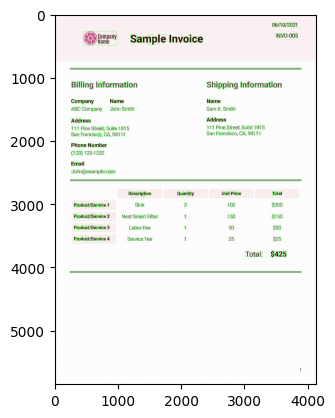

In [12]:
img = cv2.imread('sample_invoice.jpg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
plt.imshow(img)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Text detected using regular expressions - Regex module

In [13]:

img = cv2.imread('sample_invoice.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())
date=''
email=''
invoice=''
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
email_pattern="^[a-zA-Z0-9+_.-]+@[a-zA-Z0-9.-]+$"
invoice_pattern='^INVO-00\d{1}$'
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
            date=d['text'][i]
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    if int(d['conf'][i]) > 60:
    	if re.match(email_pattern, d['text'][i]):
            email=d['text'][i]
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    if int(d['conf'][i]) > 60:
    	if re.match(invoice_pattern, d['text'][i]):
            invoice=d['text'][i]
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
resized_image = cv2.resize(img, (1000, 1080))
print("Date:",date)
print("Email: ",email)
print("Invoice number: ",invoice)
cv2.imshow('img', resized_image)
cv2.waitKey(0)

Date: 06/10/2021
Email:  John@example.com
Invoice number:  INVO-005


-1

# Tabular Data- Converting Text to Data Frame

In [14]:
data = pytesseract.image_to_data(img,output_type='data.frame', config=custom_config)

In [15]:
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,4134,5851,-1.000000,NaN
1,2,1,1,0,0,0,256,143,3626,5503,-1.000000,NaN
2,3,1,1,1,0,0,461,143,3373,345,-1.000000,NaN
3,4,1,1,1,1,0,3429,143,390,60,-1.000000,NaN
4,5,1,1,1,1,1,3429,143,390,60,92.803223,06/10/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
110,4,1,1,11,6,0,3003,3741,649,109,-1.000000,NaN
111,5,1,1,11,6,1,3003,3752,267,88,96.096077,Total:
112,5,1,1,11,6,2,3406,3741,246,109,96.689781,$425
113,4,1,1,11,7,0,3861,5599,21,47,-1.000000,NaN


In [16]:
row_index = data.index[data['text'] == 'Description'].tolist()
row_index=row_index[0]
print(row_index)

73


# Creating a child data frame for just the tabular data Starting from 'Description'

In [17]:
table_data_frame=data.loc[row_index:]
table_data_frame

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
73,5,1,1,11,1,1,1161,2806,356,76,96.321327,Description
74,5,1,1,11,1,2,1930,2806,262,76,96.209320,Quantity
75,5,1,1,11,1,3,2632,2810,125,52,96.147247,Unit
76,5,1,1,11,1,4,2774,2810,161,52,95.872299,Price
77,5,1,1,11,1,5,3427,2810,152,52,96.710457,Total
78,4,1,1,11,2,0,298,2983,3290,72,-1.000000,NaN
79,5,1,1,11,2,1,298,2993,507,58,96.096840,Product/Service
80,5,1,1,11,2,2,826,2993,26,52,96.484795,1
81,5,1,1,11,2,3,1266,2988,141,57,96.365341,Sink
82,5,1,1,11,2,4,2040,2988,37,57,84.676727,2


In [18]:
def optimizeDf(old_df: pd.DataFrame) -> pd.DataFrame:
    df = old_df[["left", "top", "width", "text"]]
    df['left+width'] = df['left'] + df['width']
    df = df.sort_values(by=['top'], ascending=True)
    df = df.groupby(['top', 'left+width'], sort=False)['text'].sum().unstack('left+width')
    df = df.reindex(sorted(df.columns), axis=1).dropna(how='all').dropna(axis='columns', how='all')
    df = df.fillna('')
    return df

data_imp_sort = optimizeDf(table_data_frame)

C:\Users\shree\AppData\Local\Temp\ipykernel_21068\2392248819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['left+width'] = df['left'] + df['width']


In [19]:
def mergeDfColumns(old_df: pd.DataFrame, threshold: int = 10, rotations: int = 5) -> pd.DataFrame:
  df = old_df.copy()
  for j in range(0, rotations):
    new_columns = {}
    old_columns = df.columns
    i = 0
    while i < len(old_columns):
      if i < len(old_columns) - 1:
        # If the difference between consecutive column names is less than the threshold
        if any(old_columns[i+1] == old_columns[i] + x for x in range(1, threshold)):
          new_col = df[old_columns[i]].astype(str) + df[old_columns[i+1]].astype(str)
          new_columns[old_columns[i+1]] = new_col
          i = i + 1
        else: # If the difference between consecutive column names is greater than or equal to the threshold
          new_columns[old_columns[i]] = df[old_columns[i]]
      else: # If the current column is the last column
        new_columns[old_columns[i]] = df[old_columns[i]]
      i += 1
    df = pd.DataFrame.from_dict(new_columns).replace('', np.nan).dropna(axis='columns', how='all')
  return df.replace(np.nan, '')
    
df_new_col = mergeDfColumns(data_imp_sort)


In [20]:
df_new_col

,805,863,1208,1365,1391,1407,1433,1507,1517,1533,...,2192,2757,2824,2842,2935,3270,3568,3588,3652,3882
top,,,,,,,,,,,,,,,,,,,,,
2806,,nannan,,,,,,,Description,,...,Quantity,,,,,,,,,
2810,,nannan,,,,,,,,,...,,Unit,,,Price,,,Total,,
2983,,nannan,,,,,,,,,...,,,,,,,,$200,,
2988,,nannan,,,,Sink,,,,,...,,,,100,,,,,,
2993,Product/Service,1nan,,,,,,,,,...,,,,,,,,,,
3166,,nannan,,,,,,,,,...,,,,,,,,$150,,
3171,Product/Service,nan2,,,,,Smart,,,,...,,,,150,,,,,,
3172,,nannan,Nest,,,,,,,,...,,,,,,,,,,
3344,,nannan,,,,,,,,,...,,,,,,,$50,,,


# Manual Data Cleaning
#### Note: Errors may occur due to new axes everytime while restarting the kernel, but the final output remains the same

In [21]:
df_new_col.columns

Index([ 805,  863, 1208, 1365, 1391, 1407, 1433, 1507, 1517, 1533, 1627, 2067,
       2077, 2192, 2757, 2824, 2842, 2935, 3270, 3568, 3588, 3652, 3882],
      dtype='int64')

In [22]:
df_new_col=df_new_col.drop(863,axis=1)
df_new_col

,805,1208,1365,1391,1407,1433,1507,1517,1533,1627,...,2192,2757,2824,2842,2935,3270,3568,3588,3652,3882
top,,,,,,,,,,,,,,,,,,,,,
2806,,,,,,,,Description,,,...,Quantity,,,,,,,,,
2810,,,,,,,,,,,...,,Unit,,,Price,,,Total,,
2983,,,,,,,,,,,...,,,,,,,,$200,,
2988,,,,,Sink,,,,,,...,,,,100,,,,,,
2993,Product/Service,,,,,,,,,,...,,,,,,,,,,
3166,,,,,,,,,,,...,,,,,,,,$150,,
3171,Product/Service,,,,,Smart,,,,Filter,...,,,,150,,,,,,
3172,,Nest,,,,,,,,,...,,,,,,,,,,
3344,,,,,,,,,,,...,,,,,,,$50,,,


In [23]:
df_new_col[1208] = df_new_col[1208].shift(-1)
df_new_col

,805,1208,1365,1391,1407,1433,1507,1517,1533,1627,...,2192,2757,2824,2842,2935,3270,3568,3588,3652,3882
top,,,,,,,,,,,,,,,,,,,,,
2806,,,,,,,,Description,,,...,Quantity,,,,,,,,,
2810,,,,,,,,,,,...,,Unit,,,Price,,,Total,,
2983,,,,,,,,,,,...,,,,,,,,$200,,
2988,,,,,Sink,,,,,,...,,,,100,,,,,,
2993,Product/Service,,,,,,,,,,...,,,,,,,,,,
3166,,,,,,,,,,,...,,,,,,,,$150,,
3171,Product/Service,Nest,,,,Smart,,,,Filter,...,,,,150,,,,,,
3172,,,,,,,,,,,...,,,,,,,,,,
3344,,,,,,,,,,,...,,,,,,,$50,,,


In [24]:
df_new_col[1407] = df_new_col[1407].shift(1)
df_new_col

,805,1208,1365,1391,1407,1433,1507,1517,1533,1627,...,2192,2757,2824,2842,2935,3270,3568,3588,3652,3882
top,,,,,,,,,,,,,,,,,,,,,
2806,,,,,None,,,Description,,,...,Quantity,,,,,,,,,
2810,,,,,,,,,,,...,,Unit,,,Price,,,Total,,
2983,,,,,,,,,,,...,,,,,,,,$200,,
2988,,,,,,,,,,,...,,,,100,,,,,,
2993,Product/Service,,,,Sink,,,,,,...,,,,,,,,,,
3166,,,,,,,,,,,...,,,,,,,,$150,,
3171,Product/Service,Nest,,,,Smart,,,,Filter,...,,,,150,,,,,,
3172,,,,,,,,,,,...,,,,,,,,,,
3344,,,,,,,,,,,...,,,,,,,$50,,,


In [26]:
df_new_col = df_new_col.drop(index=[2810, 3172, 3350, 3530,5599])

KeyError: '[3350] not found in axis'

In [27]:
df_new_col

,805,1208,1365,1391,1407,1433,1507,1517,1533,1627,...,2192,2757,2824,2842,2935,3270,3568,3588,3652,3882
top,,,,,,,,,,,,,,,,,,,,,
2806,,,,,None,,,Description,,,...,Quantity,,,,,,,,,
2810,,,,,,,,,,,...,,Unit,,,Price,,,Total,,
2983,,,,,,,,,,,...,,,,,,,,$200,,
2988,,,,,,,,,,,...,,,,100,,,,,,
2993,Product/Service,,,,Sink,,,,,,...,,,,,,,,,,
3166,,,,,,,,,,,...,,,,,,,,$150,,
3171,Product/Service,Nest,,,,Smart,,,,Filter,...,,,,150,,,,,,
3172,,,,,,,,,,,...,,,,,,,,,,
3344,,,,,,,,,,,...,,,,,,,$50,,,


In [28]:
df_new_col=df_new_col.drop(2067,axis=1)

In [29]:
df_new_col=df_new_col.drop(2077,axis=1)

In [30]:
df_new_col

,805,1208,1365,1391,1407,1433,1507,1517,1533,1627,2192,2757,2824,2842,2935,3270,3568,3588,3652,3882
top,,,,,,,,,,,,,,,,,,,,
2806,,,,,None,,,Description,,,Quantity,,,,,,,,,
2810,,,,,,,,,,,,Unit,,,Price,,,Total,,
2983,,,,,,,,,,,,,,,,,,$200,,
2988,,,,,,,,,,,,,,100,,,,,,
2993,Product/Service,,,,Sink,,,,,,,,,,,,,,,
3166,,,,,,,,,,,,,,,,,,$150,,
3171,Product/Service,Nest,,,,Smart,,,,Filter,,,,150,,,,,,
3172,,,,,,,,,,,,,,,,,,,,
3344,,,,,,,,,,,,,,,,,$50,,,


In [31]:
df_new_col = df_new_col.drop_duplicates()
df_new_col

,805,1208,1365,1391,1407,1433,1507,1517,1533,1627,2192,2757,2824,2842,2935,3270,3568,3588,3652,3882
top,,,,,,,,,,,,,,,,,,,,
2806,,,,,None,,,Description,,,Quantity,,,,,,,,,
2810,,,,,,,,,,,,Unit,,,Price,,,Total,,
2983,,,,,,,,,,,,,,,,,,$200,,
2988,,,,,,,,,,,,,,100,,,,,,
2993,Product/Service,,,,Sink,,,,,,,,,,,,,,,
3166,,,,,,,,,,,,,,,,,,$150,,
3171,Product/Service,Nest,,,,Smart,,,,Filter,,,,150,,,,,,
3172,,,,,,,,,,,,,,,,,,,,
3344,,,,,,,,,,,,,,,,,$50,,,


In [32]:
# df_new_col['Description'] = pd.concat([df_new_col[1208],df_new_col[1627]])
# df["period"] = df[['Courses', 'Duration']].agg('-'.join, axis=1)
df_new_col = df_new_col.dropna(how='all', axis=1)
df_new_col.at[3171, 'Description'] = df_new_col.loc[3171, 1208] + df_new_col.loc[3171, 1433] + df_new_col.loc[3171, 1627]
df_new_col.at[2993, 'Description'] = df_new_col.loc[2993, 1407]
df_new_col.at[3349, 'Description'] = df_new_col.loc[3349, 1365] + df_new_col.loc[3349, 1507]
df_new_col.at[3527, 'Description'] = df_new_col.loc[3527, 1391] + df_new_col.loc[3527, 1533]

df_new_col=df_new_col.drop(1208,axis=1)
df_new_col=df_new_col.drop(1365,axis=1)
df_new_col=df_new_col.drop(1391,axis=1)
df_new_col=df_new_col.drop(1407,axis=1)
df_new_col=df_new_col.drop(1433,axis=1)
df_new_col=df_new_col.drop(1507,axis=1)
df_new_col=df_new_col.drop(1517,axis=1)
df_new_col=df_new_col.drop(1533,axis=1)
df_new_col=df_new_col.drop(1627,axis=1)


#df_new_col['Description'] = df_new_col[[1208,1365,1391,1407,1433,1507,1533,1627]].agg(''.join, axis=1).join([None])
df_new_col


,805,2192,2757,2824,2842,2935,3270,3568,3588,3652,3882,Description
top,,,,,,,,,,,,
2806,,Quantity,,,,,,,,,,nan
2810,,,Unit,,,Price,,,Total,,,nan
2983,,,,,,,,,$200,,,nan
2988,,,,,100,,,,,,,nan
2993,Product/Service,,,,,,,,,,,Sink
3166,,,,,,,,,$150,,,nan
3171,Product/Service,,,,150,,,,,,,NestSmartFilter
3172,,,,,,,,,,,,nan
3344,,,,,,,,$50,,,,nan


In [33]:
df_new_col.at[2993,'Quantity']=2
df_new_col.at[3171,'Quantity']=1
df_new_col.at[3349,'Quantity']=1
df_new_col.at[3527,'Quantity']=1
df_new_col

,805,2192,2757,2824,2842,2935,3270,3568,3588,3652,3882,Description,Quantity
top,,,,,,,,,,,,,
2806,,Quantity,,,,,,,,,,nan,NaN
2810,,,Unit,,,Price,,,Total,,,nan,NaN
2983,,,,,,,,,$200,,,nan,NaN
2988,,,,,100,,,,,,,nan,NaN
2993,Product/Service,,,,,,,,,,,Sink,2.0
3166,,,,,,,,,$150,,,nan,NaN
3171,Product/Service,,,,150,,,,,,,NestSmartFilter,1.0
3172,,,,,,,,,,,,nan,NaN
3344,,,,,,,,$50,,,,nan,NaN


In [34]:
df_new_col.at[3171, 'Unit Price'] = df_new_col.loc[3171, 2843]
df_new_col.at[3349, 'Unit Price'] = df_new_col.loc[3349, 2824]
df_new_col.at[3527, 'Unit Price'] = df_new_col.loc[3527, 2824]

df_new_col[2843] = df_new_col[2843].shift(1)


KeyError: 2843

In [35]:
df_new_col.at[2993, 'Unit Price'] = df_new_col.loc[2993, 2843]
df_new_col

KeyError: 2843

In [36]:
df_new_col=df_new_col.drop(2192,axis=1)
df_new_col=df_new_col.drop(2757,axis=1)
df_new_col=df_new_col.drop(2824,axis=1)
df_new_col=df_new_col.drop(2935,axis=1)
df_new_col=df_new_col.drop(2843,axis=1)
df_new_col

KeyError: '[2843] not found in axis'

In [37]:
df_new_col

,805,2842,3270,3568,3588,3652,3882,Description,Quantity
top,,,,,,,,,
2806,,,,,,,,nan,NaN
2810,,,,,Total,,,nan,NaN
2983,,,,,$200,,,nan,NaN
2988,,100,,,,,,nan,NaN
2993,Product/Service,,,,,,,Sink,2.0
3166,,,,,$150,,,nan,NaN
3171,Product/Service,150,,,,,,NestSmartFilter,1.0
3172,,,,,,,,nan,NaN
3344,,,,$50,,,,nan,NaN


In [38]:
df_new_col[3568] = df_new_col[3568].shift(1)
df_new_col[3588] = df_new_col[3588].shift(1)

In [39]:
df_new_col

,805,2842,3270,3568,3588,3652,3882,Description,Quantity
top,,,,,,,,,
2806,,,,None,None,,,nan,NaN
2810,,,,,,,,nan,NaN
2983,,,,,Total,,,nan,NaN
2988,,100,,,$200,,,nan,NaN
2993,Product/Service,,,,,,,Sink,2.0
3166,,,,,,,,nan,NaN
3171,Product/Service,150,,,$150,,,NestSmartFilter,1.0
3172,,,,,,,,nan,NaN
3344,,,,,,,,nan,NaN


In [40]:
df_new_col.at[3349, 'Total'] = df_new_col.loc[3349, 3568]
df_new_col.at[3527, 'Total'] = df_new_col.loc[3527, 3568]
df_new_col.at[3171, 'Total'] = df_new_col.loc[3171, 3588]
df_new_col[3588] = df_new_col[3588].shift(1)
df_new_col.at[2993, 'Total'] = df_new_col.loc[2993, 3588]
df_new_col

,805,2842,3270,3568,3588,3652,3882,Description,Quantity,Total
top,,,,,,,,,,
2806,,,,None,None,,,nan,NaN,nan
2810,,,,,None,,,nan,NaN,nan
2983,,,,,,,,nan,NaN,nan
2988,,100,,,Total,,,nan,NaN,nan
2993,Product/Service,,,,$200,,,Sink,2.0,$200
3166,,,,,,,,nan,NaN,nan
3171,Product/Service,150,,,,,,NestSmartFilter,1.0,$150
3172,,,,,$150,,,nan,NaN,nan
3344,,,,,,,,nan,NaN,nan


In [41]:
df_new_col=df_new_col.drop(3568,axis=1)
df_new_col=df_new_col.drop(3588,axis=1)
df_new_col=df_new_col.drop(3882,axis=1)
df_new_col[3652] = df_new_col[3652].shift(1)
df_new_col

,805,2842,3270,3652,Description,Quantity,Total
top,,,,,,,
2806,,,,None,nan,NaN,nan
2810,,,,,nan,NaN,nan
2983,,,,,nan,NaN,nan
2988,,100,,,nan,NaN,nan
2993,Product/Service,,,,Sink,2.0,$200
3166,,,,,nan,NaN,nan
3171,Product/Service,150,,,NestSmartFilter,1.0,$150
3172,,,,,nan,NaN,nan
3344,,,,,nan,NaN,nan


In [42]:
df_new_col = df_new_col.drop(index=[2806, 2983, 2988, 3166, 3344,3522,3741])


In [43]:
df_new_col = df_new_col.dropna(how='all', axis=1)

In [44]:
df_new_col=df_new_col.set_index(805)
df_new_col

,2842,3270,3652,Description,Quantity,Total
805,,,,,,
,,,,nan,NaN,nan
Product/Service,,,,Sink,2.0,$200
Product/Service,150,,,NestSmartFilter,1.0,$150
,,,,nan,NaN,nan
Product/Service,,,,LaborFee,1.0,$50
Product/Service,,,,ServiceFee,1.0,$25
,,Total:,$425,nan,NaN,nan
,,,,nan,NaN,nan


In [50]:
amount= df_new_col['Total'].to_list()
for i in amount:
    amount.remove('nan')
total=[]
for i in amount:
    i=i[1:]
    amount_int=int(i)
    total.append(amount_int)
no_of_products=len(total)
total=sum(total)
print("Total amount: ",total)
print("No of products: ",no_of_products)

Total amount:  425
No of products:  4


# Finding data grouped together using indices

In [52]:
billing_index = data.index[data['text'] == 'Billing'].tolist()
row_index=billing_index[0]
print(billing_index)

[16]


In [53]:
billing_index=data_original.find('Billing')
print(data_original[billing_index:])
#billing infromation is just before desrpition




Billing Information Shipping Information

Company Name Name

ABC Company John Smith Sam K. Smith

Address Address

111 Pine Street, Suite 1815 111 Pine Street, Suite 1815

San Francisco, CA, 94111 san Francisco, CA, 94111

Phone Number

(123) 123-1232

Email

John@example.com

Description Quantity Unit Price Total
Product/Service 1 Sink 2 100 $200
Product/Service 2 Nest Smart Filter 1 150 $150
Product/Service 3 Labor Fee 1 50 $50
Product/Service 4 Service Fee 1 25 $25
Total: $425
1



In [54]:
description_index=data_original.find('Description')
billing_shipping_data=data_original[billing_index:description_index]
print(data_original[billing_index:description_index])

Billing Information Shipping Information

Company Name Name

ABC Company John Smith Sam K. Smith

Address Address

111 Pine Street, Suite 1815 111 Pine Street, Suite 1815

San Francisco, CA, 94111 san Francisco, CA, 94111

Phone Number

(123) 123-1232

Email

John@example.com




# Printing all the variables:

In [55]:
print("Invoice date:",date)


Invoice date: 06/10/2021


In [56]:
print("Invoice number: ",invoice)

Invoice number:  INVO-005


In [57]:
print("Billing & Shipping information: ")
print(billing_shipping_data)

Billing & Shipping information: 
Billing Information Shipping Information

Company Name Name

ABC Company John Smith Sam K. Smith

Address Address

111 Pine Street, Suite 1815 111 Pine Street, Suite 1815

San Francisco, CA, 94111 san Francisco, CA, 94111

Phone Number

(123) 123-1232

Email

John@example.com




In [59]:
print("Email: ",email)

Email:  John@example.com


In [60]:
print("Total invoice amount: ", total)

Total invoice amount:  425


In [61]:
print("No of items: ",no_of_products)

No of items:  4
